In [1]:
import pickle
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
base_path = '/content/gdrive/My Drive/ZFDataset/'

In [ ]:
syllable_df_Nest_Total = pd.read_pickle(base_path+'Nest1_Densenet121.pkl')

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram,labels_indv,densenet121_features
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_-,"[0.00036964213, 0.0061388216, 0.0023623325, 0...."
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_a,"[0.00039546576, 0.0042689457, 0.0021646945, 0...."
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_b,"[0.00043923515, 0.0035873966, 0.0023025582, 0...."
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_c,"[0.0004885812, 0.0055127405, 0.0017675881, 0.0..."
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_d,"[0.00040706727, 0.004342597, 0.0018088806, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...
2934,0.102356,0.135123,0,phpd,1,phpd_0062,"[-0.0035796678, 0.00066409475, 0.0039508683, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00035229328, 0.0069653825, 0.00236547, 0.00..."
2935,0.228433,0.287435,0,phpd,2,phpd_0062,"[0.0010511333, 0.00033233757, -0.00028101055, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00036833377, 0.006149904, 0.0025585291, 0.0..."
2936,0.323399,0.392424,0,phpd,3,phpd_0062,"[0.0036439702, 0.001985288, 0.00042269952, -0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00036655215, 0.005553442, 0.0027189297, 0.0..."
2937,0.426528,0.540746,0,phpd,4,phpd_0062,"[0.007070427, 0.0066078743, 0.0063827583, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00043264066, 0.004336921, 0.002199093, 0.00..."


In [ ]:
Nest1 = pd.read_pickle(base_path+'zf_Nest1_noRescale1.pickle')

In [ ]:
Nest1

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
2934,0.102356,0.135123,0,phpd,1,phpd_0062,"[-0.0035796678, 0.00066409475, 0.0039508683, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2935,0.228433,0.287435,0,phpd,2,phpd_0062,"[0.0010511333, 0.00033233757, -0.00028101055, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2936,0.323399,0.392424,0,phpd,3,phpd_0062,"[0.0036439702, 0.001985288, 0.00042269952, -0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2937,0.426528,0.540746,0,phpd,4,phpd_0062,"[0.007070427, 0.0066078743, 0.0063827583, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
ls

gdrive/  sample_data/


In [4]:
!git clone https://github.com/AvisP/Nest-Seq-Analysis.git

Cloning into 'Nest-Seq-Analysis'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 95 (delta 22), reused 48 (delta 3), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [5]:
cd Nest-Seq-Analysis/

/content/Nest-Seq-Analysis


In [6]:
ls

avgn/  models/  notebooks/  README.md  scripts/


In [7]:
pip install pathlib2

In [8]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm
import pandas as pd
pd.options.display.max_columns = None
import librosa
from datetime import datetime
import numpy as np
import pathlib2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [9]:
import avgn
from avgn.custom_parsing.bengalese_finch_sakata import (
    generate_json_wav_not_mat,
    parse_song_df,
)
from avgn.utils.paths import DATA_DIR

In [10]:
DATASET_ID = 'zebra_finch_sakata'
species = "Taeniopygia guttata"
common_name = "Zebra Finch"

DT_ID = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
DT_ID

'2021-06-28_05-01-32'

In [155]:
# For clearing out the contents of WAV and JSON files from last run
import os, shutil
folder_JSON = "/".join(['/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata',DT_ID,'JSON'])
folder_WAV = "/".join(['/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata',DT_ID,'WAV'])

def remove_files_given_folder(folder):
  for filename in os.listdir(folder):
      file_path = os.path.join(folder, filename)
      try:
          if os.path.isfile(file_path) or os.path.islink(file_path):
              os.unlink(file_path)
          elif os.path.isdir(file_path):
              shutil.rmtree(file_path)
      except Exception as e:
          print('Failed to delete %s. Reason: %s' % (file_path, e))

remove_files_given_folder(folder_JSON)
remove_files_given_folder(folder_WAV)

In [122]:
folder_WAV

'/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata/2021-06-28_05-01-32/WAV'

In [123]:
# DSLOC = avgn.utils.paths.Path('I:/ZebraFinchGenerations/Nest5')
DSLOC = avgn.utils.paths.Path('/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj')
DSLOC

PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj')

## DSLOC is single folder 


In [125]:
WAVLIST = list((DSLOC).expanduser().glob('*.wav'))
len(WAVLIST), WAVLIST[0]

MATLIST = list((DSLOC).expanduser().glob('*.wav.not.mat'))
len(MATLIST), MATLIST[0]

song_df = parse_song_df(WAVLIST,MATLIST)

song_df[:3]

wav_names = np.array([i.name for i in WAVLIST])



  0%|          | 0/31 [00:00<?, ?it/s]

 35%|███▌      | 11/31 [00:00<00:00, 101.50it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files




 71%|███████   | 22/31 [00:00<00:00, 102.52it/s]

100%|██████████| 31/31 [00:00<00:00, 93.24it/s]


In [126]:
wav_names

array(['kfgj_40869235.wav', 'kfgj_40880785.wav', 'kfgj_41673715.wav',
       'kfgj_41683765.wav', 'kfgj_41705725.wav', 'kfgj_41737975.wav',
       'kfgj_41789225.wav', 'kfgj_41893313.wav', 'kfgj_42017815.wav',
       'kfgj_42256705.wav', 'kfgj_42295135.wav', 'kfgj_42619675.wav',
       'kfgj_42665923.wav', 'kfgj_42681285.wav', 'kfgj_42763383.wav',
       'kfgj_43437825.wav', 'kfgj_43519603.wav', 'kfgj_43684683.wav',
       'kfgj_43716843.wav', 'kfgj_44313795.wav', 'kfgj_45004903.wav',
       'kfgj_46796845.wav', 'kfgj_46804335.wav', 'kfgj_46964893.wav',
       'kfgj_46976605.wav', 'kfgj_47093135.wav', 'kfgj_47111003.wav',
       'kfgj_44243045.wav', 'kfgj_46646865.wav', 'kfgj_42276243.wav',
       'kfgj_42276243_Copy.wav'], dtype='<U22')

## DSLOC has multiple folders

In [ ]:
folder_list = list((DSLOC).expanduser().glob('*'))

WAVPATH = []

for idx, folder_path in enumerate(folder_list):
    WAVLIST = list((pathlib2.Path(folder_path.parent,folder_path.parts[-1])).expanduser().glob('*.wav'))
    MATLIST = list((pathlib2.Path(folder_path.parent,folder_path.parts[-1])).expanduser().glob('*.wav.not.mat'))
    song_temp = parse_song_df(WAVLIST,MATLIST)
    if idx == 0:
        song_df = song_temp
        wav_names = np.array([i.name for i in WAVLIST])
        WAVPATH = WAVLIST
    else:
        song_df = pd.concat([song_df, song_temp], axis=0, ignore_index=True)
        wav_names = np.concatenate((wav_names, np.array([i.name for i in WAVLIST])), axis=0)
        WAVPATH = WAVPATH + WAVLIST
    
# song_df = song_df.drop(columns='index')
WAVLIST = WAVPATH

 19%|█▉        | 12/64 [00:00<00:00, 117.85it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files


 38%|███▊      | 17/45 [00:00<00:00, 155.53it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files


100%|██████████| 30/30 [00:00<00:00, 154.18it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files


In [ ]:
WAVLIST

[PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_48145024.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_54761059.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_58522509.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_58555404.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_59731544.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_62727694.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_72802769.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_74112524.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_67651004.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_57835804.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38111124.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38095304.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_46

# Common section for both


In [127]:
Parallel(n_jobs=1, verbose=10)(
    delayed(generate_json_wav_not_mat)(row, WAVLIST, wav_names, DT_ID, species, common_name, DATASET_ID)
    for idx, row in tqdm(song_df.iterrows(), total=len(song_df))
);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_40880785.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_41673715.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_41683765.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_41705725.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_41737975.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_41789225.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_41893313.wav


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42017815.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42256705.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42295135.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42619675.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42665923.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42681285.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_42763383.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_43437825.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_43519603.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_43684683.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_43716843.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_44243045.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_44313795.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_45004903.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_46646865.wav
/content/gdrive/MyDrive/ZFDataset/Nest8/kfgj/kfgj_46796

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.0s finished


In [128]:
pip install noisereduce

In [129]:
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio
from avgn.visualization.spectrogram import plot_spec
from avgn.song_segmentation.dynamic_thresholding import norm

In [130]:
DATASET_ID = 'zebra_finch_sakata'

hparams = HParams(
    n_fft = 4096,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,  # Should be sample_rate / 2 or less
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -100,
    win_length_ms = 10,
    hop_length_ms = 1,
    num_mel_bins = 32,
    mask_spec = True,
    n_jobs = 1,  # Makes processing serial if set to 1, parallel processing giving errors
    verbosity=1,
    nex = -1
)

In [131]:
dataset = DataSet(DATASET_ID, hparams = hparams)
dataset.sample_json
len(dataset.data_files)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


30

In [132]:
### Create dataset based upon JSON
from joblib import Parallel, delayed
n_jobs = 1; verbosity = 10

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=['labels'],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


608

In [133]:
## Add wav location and audio to dataframe

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/content/Nest-Seq-Analysis/avgn/signalprocessing/create_spectrogram_dataset.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for st, et in zip(syllable_df.start_time.values, syllable_df.end_time.values)
/content/Nest-Seq-Analysis/avgn/signalprocessing/create_spectrogram_dataset.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syllable_df["rate"] = rate
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remai

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


608

In [134]:
# Check for bad audio files
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])
syllable_df = syllable_df[np.array(df_mask)]

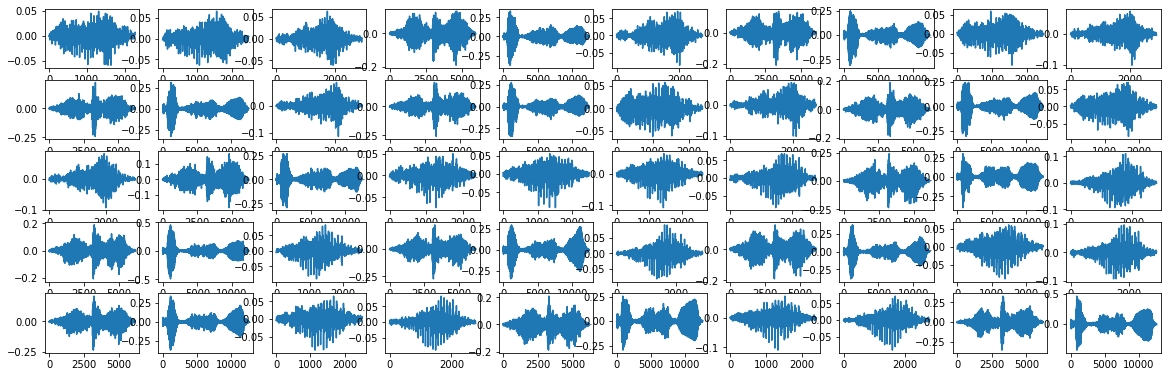

In [135]:
# Plot some audio syllables
sylls = syllable_df.audio.values

nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

# Spectrogram generation section


In [136]:
# Make spectrogram
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.spectrogram import draw_spec_set_actual
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram
from avgn.visualization.spectrogram import plot_spec, visualize_spec

from avgn.utils.audio import load_wav, read_wav
from avgn.signalprocessing.filtering import butter_bandpass_filter
from avgn.signalprocessing.spectrogramming import spectrogram

In [137]:
(dataset.wav_files[10].as_posix())

'/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata/2021-06-28_05-01-32/WAV/kfgj_0013.WAV'

In [138]:
#### -----------   Plotting a sample data file --------------------- ####
rate, data_loaded = load_wav(dataset.wav_files[10])
data = data_loaded
times = np.linspace(0,len(data)/rate,len(data));

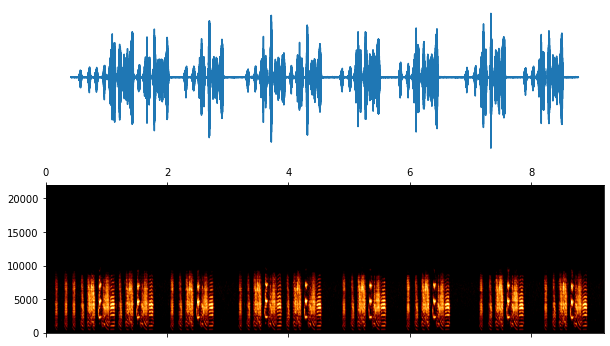

In [139]:
# Plot audio and spectrogram of sample audio file
# filter data
butter_min = hparams.butter_lowcut
butter_max = hparams.butter_highcut
data = butter_bandpass_filter(data, butter_min, butter_max, rate)

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(10, 6))
axs[0].set_axis_off()
axs[0].get_tightbbox('True')
axs[0].plot(times,data)
# ax[0].axis('off')


hparams.sample_rate = rate

hparams.ref_level_db = 60
spec_orig = spectrogram(data,
                            rate,
                            hparams)
plot_spec(
    norm(spec_orig),
    fig=fig,
    ax=axs[1],
    rate=rate,
    hop_len_ms=hparams.hop_length_ms,
    cmap=plt.cm.afmhot,
    show_cbar=False,
    figsize=(10, 6),
)

In [140]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [141]:
np.shape(syllables_wav)

(608,)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2332
  n_fft, y.shape[-1]


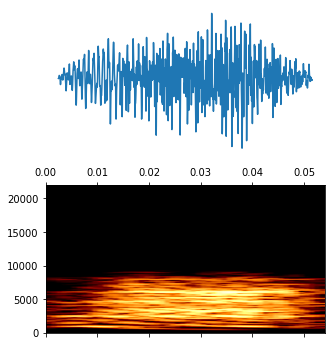

In [142]:
###  ---  Indivdual audio snippet  ----   ###
i=50

spec = spectrogram(syllables_wav[i], syllables_rate[i], hparams)

times = np.linspace(0,len(syllables_wav[i])/syllables_rate[i],len(syllables_wav[i]));

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(5, 6))
axs[0].set_axis_off()
axs[0].get_tightbbox('True')
axs[0].plot(times,syllables_wav[i])

plot_spec(
    norm(spec),
    fig=fig,
    ax=axs[1],
    rate=syllables_rate[i],
    hop_len_ms=hparams.hop_length_ms,
    cmap=plt.cm.afmhot,
    show_cbar=False,
    figsize=(5, 6),
)

In [ ]:
# ### --- Displays specs in sequence of windows --- ###

# for i in range(0,50):
#     fig, axs = plt.subplots(nrows=1,ncols=1, figsize=(5, 6))
#     plot_spec(
#         norm(syllable_df.spectrogram.values[i]),
#         fig=fig,
#         ax=axs,
#         rate=syllables_rate[i],
#         hop_len_ms=hparams.hop_length_ms,
#         cmap=plt.cm.afmhot,
#         show_cbar=False,
#         figsize=(5, 6),
#     )
#     plt.title(i)
#     plt.show(block=False)
#     plt.pause(0.5)
#     plt.close()

In [143]:
### --- Compute Spectrograms --- ###

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(spectrogram)(
            syllable,
            rate,
            hparams=dataset.hparams
        #     mel_matrix=dataset.mel_matrix,
        #     use_mel=True,
        #     use_tensorflow=False,
         )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2282
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2487
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2915
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/lib

In [ ]:
# draw_spec_set_actual(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [ ]:
# ####  -----------  Rescaling --------  #### (Avoid this if possible)
    
# log_scaling_factor = 4

# with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
#     syllables_spec = parallel(
#         delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
#         for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
#     )  

In [144]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens) # Set this as 467 based on Nest 2
print(pad_length)
if pad_length < 467:
  pad_length = 467
else:
  print('New syllable with longer syllable length found')

293


In [145]:
pad_length

467

In [146]:
###  Discards the top half of frequency range ###

def freq_range_reduction(spec, yrange=0.5):
    ylim = int(np.floor(spec.shape[0]*yrange))
    spec = spec[:ylim,:]
    return spec

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    
    syllables_spec = parallel(
        delayed(freq_range_reduction)(spec, yrange=0.5)
        for spec in tqdm(
            syllables_spec, desc="resizing spectrogram frequency", leave=False
        )
    )
# np.shape(syllables_spec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.0s finished


In [147]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )
np.shape(syllables_spec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    3.0s finished


(608, 1024, 467)

In [148]:
### To save space back to dataframe
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

syllable_df['spectrogram'] = syllables_spec

In [149]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'zf_Nest8_kgj_noRescale.pickle'

In [150]:
save_loc

PosixPath('/content/Nest-Seq-Analysis/data/syllable_dfs/zebra_finch_sakata/zf_Nest8_kgj_noRescale.pickle')

In [151]:
ensure_dir(save_loc)
syllable_df.to_pickle(save_loc)

In [110]:
del syllable_df

In [152]:
syllable_df

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.152486,0.204232,0,kfgj,1,kfgj_0020,"[-0.0005392651, -0.0014964477, -0.0020690903, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.283099,0.339493,0,kfgj,2,kfgj_0020,"[-0.0026307723, -0.0022371006, -0.0014938286, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.402713,0.468813,0,kfgj,3,kfgj_0020,"[0.0014539938, 0.0014892437, 0.0016107005, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.505842,0.641239,0,kfgj,4,kfgj_0020,"[0.00073205435, 0.0011374536, 0.0013747414, 0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.683552,0.964731,0,kfgj,5,kfgj_0020,"[0.0003378363, 0.00044618238, 0.00022706711, -...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
14,3.008822,3.296736,0,kfgj,15,kfgj_0011,"[0.00012558994, 0.00015187469, 0.00013816796, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
15,3.770296,3.826940,0,kfgj,16,kfgj_0011,"[-0.0058394424, -0.0069551896, -0.0073392363, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
16,3.908505,3.970614,0,kfgj,17,kfgj_0011,"[0.0007787884, 0.0004573827, -0.00046244593, -...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
17,4.015580,4.157779,0,kfgj,18,kfgj_0011,"[-0.00076635333, 0.0012737293, 0.0025384706, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
pd.read_pickle('/content/Nest-Seq-Analysis/data/syllable_dfs/zebra_finch_sakata/zf_Nest8_ihza_noRescale.pickle')